In [1]:
import pandas as pd
import numpy as np
#1-downloaded the dataset
#2-loaded the dataset
df=pd.read_csv("E:/sem7/ibm/ibm-assignment4/Mall_Customers.csv")

In [2]:
df.head()

,CustomerID,Gender,Age,AnnualIncome(k$),SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import seaborn as sns

(array([ 88.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 112.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


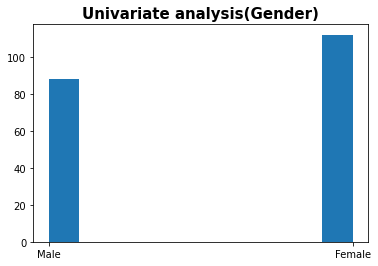

In [5]:
#3-performing visualizations
#3a-univariate analysis

plt.title("Univariate analysis(Gender)", fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
plt.hist(df.Gender)

<AxesSubplot:title={'center':'Bivariate analysis(Gender and annual income )'}, xlabel='AnnualIncome(k$)', ylabel='count'>

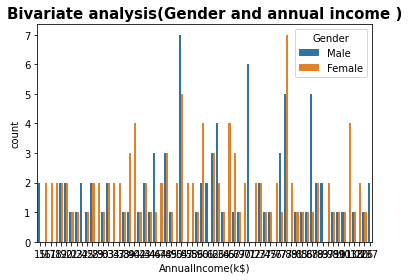

In [6]:
#3b-bivariate analysis
plt.title("Bivariate analysis(Gender and annual income )", fontsize=15, fontweight='bold', ha='center')
sns.countplot(x = "AnnualIncome(k$)", hue = 'Gender', data = df)

Multivariate Analysis


<AxesSubplot:>

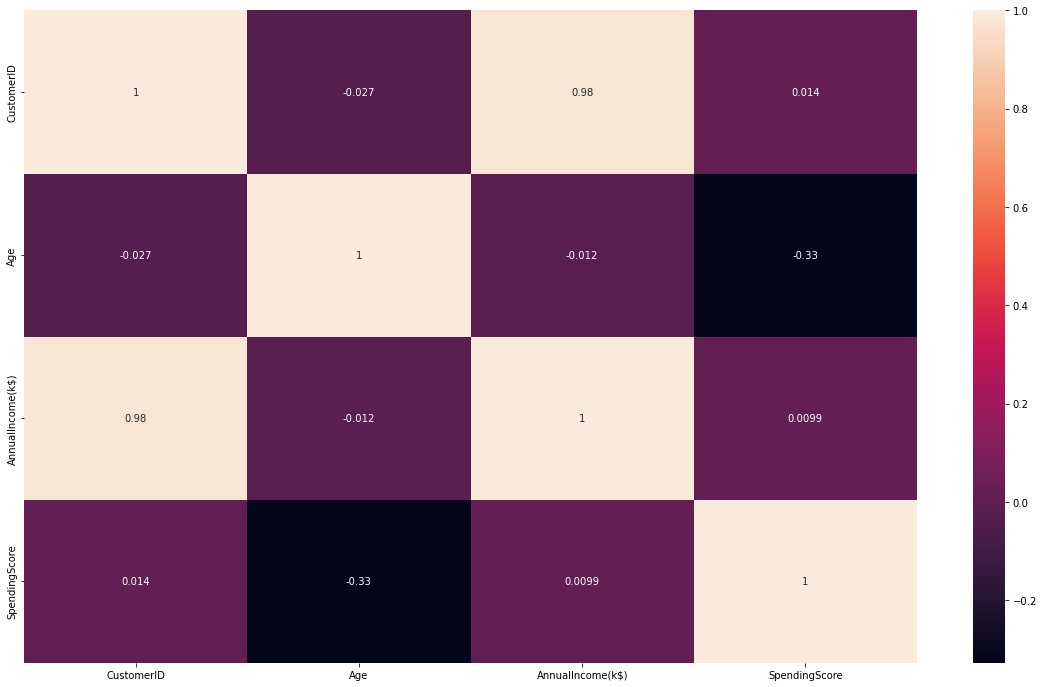

In [7]:
#3c-multivariate analysis
print("Multivariate Analysis")
corr = df.corr()
plt.figure(figsize = (20, 12))
sns.heatmap(corr, annot = True)

In [8]:
#4-descriptive statistics
df.describe()

,CustomerID,Age,AnnualIncome(k$),SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
#5-handling missing values
df.isnull().sum()

CustomerID          0
Gender              0
Age                 0
AnnualIncome(k$)    0
SpendingScore       0
dtype: int64

In [10]:
df.isna().any()

CustomerID          False
Gender              False
Age                 False
AnnualIncome(k$)    False
SpendingScore       False
dtype: bool

C:\Users\gayathri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SpendingScore'>

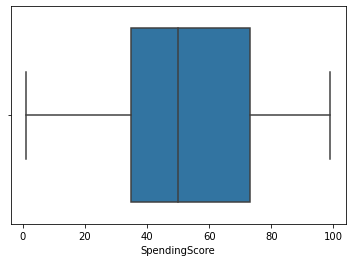

In [11]:
#6-handling outliers
#finding outliers
sns.boxplot(df.SpendingScore)

In [12]:
#7-encoding categorical columns
from sklearn import preprocessing
cat_columns = [cname for cname in df.columns
                        if df[cname].dtype == 'object']

encoder = preprocessing.LabelEncoder()

for col in cat_columns:
    df[col] = encoder.fit_transform(df[col])
    
df.head()

,CustomerID,Gender,Age,AnnualIncome(k$),SpendingScore
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [13]:
new_df=df.iloc[:,:-1]
new_df.head()

,CustomerID,Gender,Age,AnnualIncome(k$)
0,1,1,19,15
1,2,1,21,15
2,3,0,20,16
3,4,0,23,16
4,5,0,31,17


In [14]:
from sklearn import cluster

In [15]:
#9-performing k-means clustering algorithm
error=[]
for i in range(1,11):
    kmeans = cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(new_df)
    error.append(kmeans.inertia_)

C:\Users\gayathri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [16]:
error

[842808.0599999999,
 254375.02790279032,
 138716.4871107067,
 95392.76089176611,
 74339.55121941707,
 63023.88081677607,
 53573.00760399022,
 44998.052643910836,
 38962.28138017457,
 34773.09987041346]

In [17]:
import matplotlib.pyplot as plt

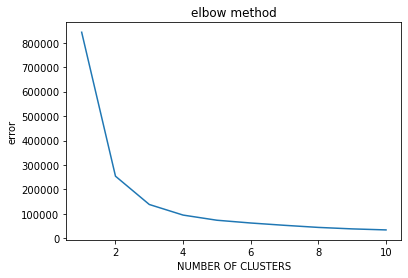

In [18]:
plt.plot(range(1,11),error)
plt.title("elbow method")
plt.xlabel("NUMBER OF CLUSTERS")
plt.ylabel("error")
plt.show()

In [19]:
km_model=cluster.KMeans(n_clusters=3,init='k-means++',random_state=0)

In [24]:

km_model.fit(new_df)

KMeans(n_clusters=3, random_state=0)

In [25]:
ykmeans=km_model.predict(new_df)

In [22]:
#10-adding the cluster to exsisting dataset
new_df['kclus']=pd.Series(ykmeans)

In [23]:
new_df.head()

,CustomerID,Gender,Age,AnnualIncome(k$),kclus
0,1,1,19,15,2
1,2,1,21,15,2
2,3,0,20,16,2
3,4,0,23,16,2
4,5,0,31,17,2


In [26]:
#11-splitting data
X=new_df.iloc[:,:-1]
X

,CustomerID,Gender,Age,AnnualIncome(k$)
0,1,1,19,15
1,2,1,21,15
2,3,0,20,16
3,4,0,23,16
4,5,0,31,17
...,...,...,...,...
195,196,0,35,120
196,197,0,45,126
197,198,1,32,126
198,199,1,32,137


In [27]:
y=new_df.kclus

In [28]:
#12-splitting data into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [45]:
#13-build a model
from sklearn.linear_model import LinearRegression
MLR = LinearRegression()

In [46]:
MLR.fit(x_train,y_train)

LinearRegression()

In [47]:
#14-training the model
y_pred = MLR.predict(x_test)
y_pred = [round(item) for item in y_pred]

In [48]:
y_test

58     2
40     2
34     2
102    1
184    0
198    0
95     1
4      2
29     2
168    0
171    0
18     2
11     2
89     1
110    1
118    1
159    0
35     2
136    0
59     2
51     2
16     2
44     2
94     1
31     2
162    0
38     2
28     2
193    0
27     2
47     2
165    0
194    0
177    0
176    0
97     1
174    0
73     1
69     1
172    0
Name: kclus, dtype: int32

In [49]:
train_pred = model.predict(x_train)
train_pred

array([1, 1, 0, 2, 2, 2, 1, 2, 0, 1, 1, 1, 1, 2, 2, 0, 0, 1, 0, 0, 1, 1,
       1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 0, 0, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1,
       0, 2, 1, 0, 0, 2, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1,
       1, 0, 2, 1, 2, 0, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 2, 2, 1, 0, 1, 1, 2, 1, 2, 0, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 1,
       2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 2])

In [50]:
#15-testing the model
pd.DataFrame({'Actual_y':y_test,'Predicted_y':y_pred})

,Actual_y,Predicted_y
58,2,2
40,2,2
34,2,2
102,1,1
184,0,0
198,0,0
95,1,1
4,2,2
29,2,2
168,0,0


In [37]:
model.predict([[1,2,25,10]])

C:\Users\gayathri\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

In [51]:
#16- Measuring performance using Metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
ridge = Ridge()
lasso = Lasso()

In [52]:
ridge.fit(x_train,y_train)

Ridge()

In [53]:
lasso.fit(x_train,y_train)

Lasso()

In [54]:
y_test_pred = ridge.predict(x_test)
y_test_pred = [round(item) for item in y_test_pred]

In [55]:
y_test_predl = lasso.predict(x_test)
y_test_predl = [round(item) for item in y_test_predl]

In [56]:
from sklearn import metrics

In [57]:
#Mean Squared Error
metrics.mean_squared_error(y_test,y_pred)

0.0

In [58]:
#ridge mse
metrics.mean_squared_error(y_test,y_test_pred)

0.0

In [59]:
#lasso mse
metrics.mean_squared_error(y_test,y_test_predl)

0.05

In [60]:
#RMSE
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

0.0

In [61]:
#ridge rmse
np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))

0.0

In [62]:
# lasso rmse 
np.sqrt(metrics.mean_squared_error(y_test,y_test_predl))

0.22360679774997896

In [63]:
#R2 Score
metrics.r2_score(y_test,y_pred)

1.0

In [64]:
# testing acc. of ridge

metrics.r2_score(y_test,y_test_pred) 

1.0

In [65]:
# testing acc. of lasso

metrics.r2_score(y_test,y_test_predl) 

0.9350121852152722